# **STUDENT PERFORMANCE PREDICTION MODEL**

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

### **Loading The Dataset**

In [2]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('StudentPerformanceFactors.csv')

# Display the first few rows of the dataset
print(df.head())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

### **Summary Statistics**

In [3]:
# Summary statistics for numerical features
print("Summary Statistics for Numerical Features:")
print(df.describe())

Summary Statistics for Numerical Features:
       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  

## **Exploratory Data Analysis (EDA)**

### **Summary of categorical features**

In [27]:
# Summary of categorical features
categorical_columns = df.select_dtypes(include=['object']).columns

print("Summary of Categorical Features:")
for column in categorical_columns:
    print(f"\n{column}:")
    print(df[column].value_counts())

Summary of Categorical Features:

Parental_Involvement:
Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64

Access_to_Resources:
Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64

Extracurricular_Activities:
Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64

Motivation_Level:
Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64

Internet_Access:
Internet_Access
Yes    6108
No      499
Name: count, dtype: int64

Family_Income:
Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64

Teacher_Quality:
Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64

School_Type:
School_Type
Public     4598
Private    2009
Name: count, dtype: int64

Peer_Influence:
Peer_Influence
Positive    2638
Neutral     2592
Negative    1377
Name: count, dtype: int64

Learning_Disabilities:
Learning_Disabiliti

### **Checking missing values**

In [28]:
# Check for missing values
print("Missing Values in the Dataset:")
print(df.isnull().sum())

Missing Values in the Dataset:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


## **Visualization**

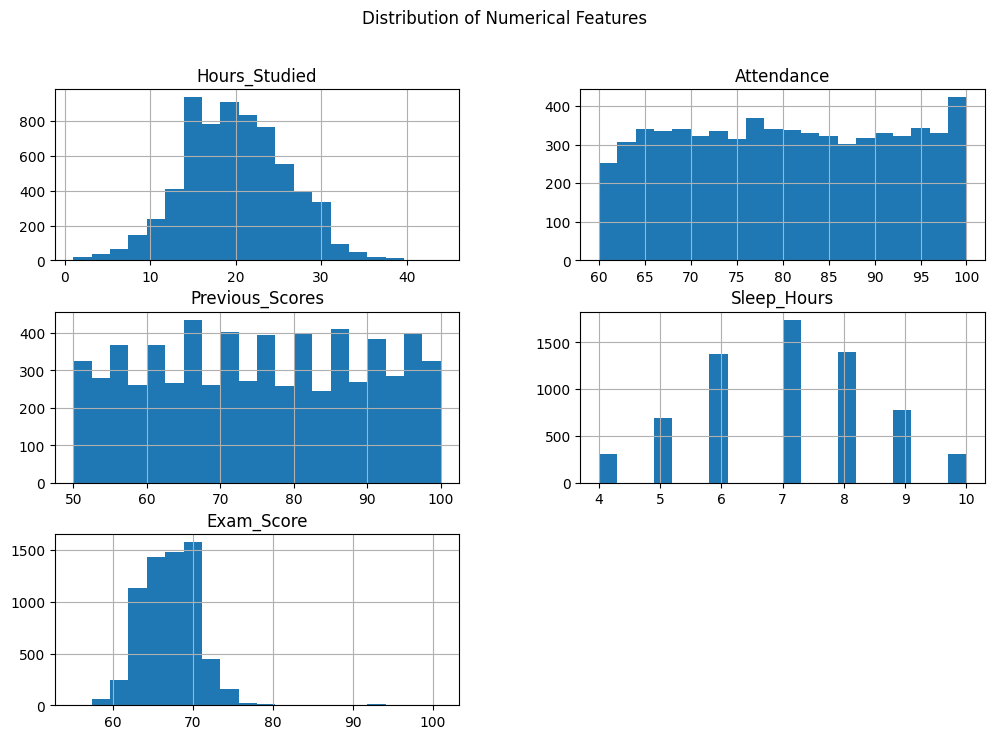

In [29]:
# Visualize distributions of numerical features
numerical_features = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Sleep_Hours', 'Exam_Score']
df[numerical_features].hist(bins=20, figsize=(12, 8))
plt.suptitle("Distribution of Numerical Features")
plt.show()


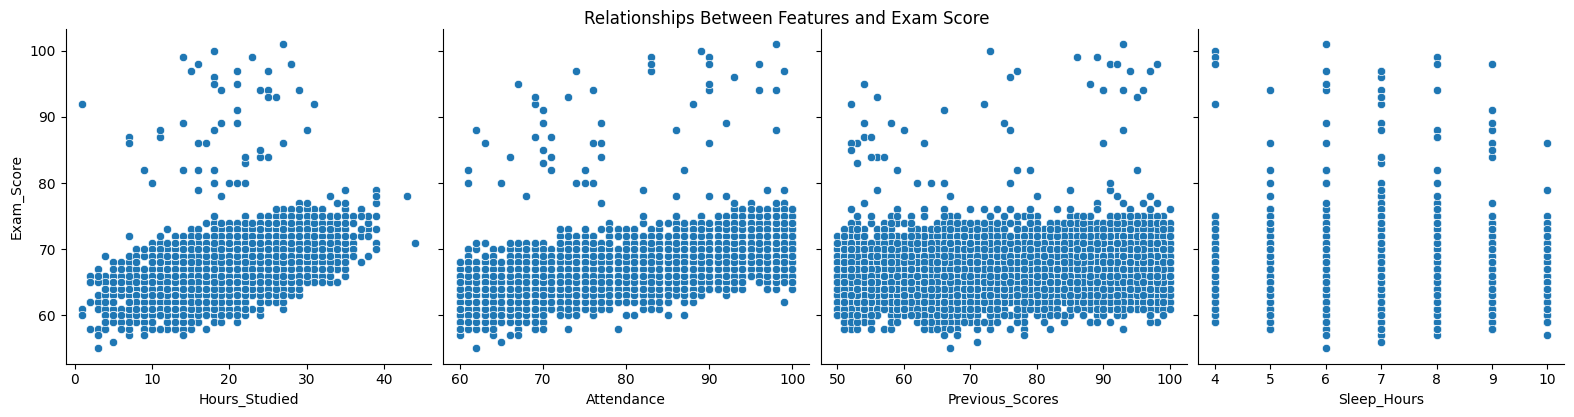

In [30]:
# Visualize relationships between features and the target variable (Exam_Score)
sns.pairplot(df, x_vars=numerical_features[:-1], y_vars='Exam_Score', height=4, aspect=1, kind='scatter')
plt.suptitle("Relationships Between Features and Exam Score", y=1.02)
plt.show()

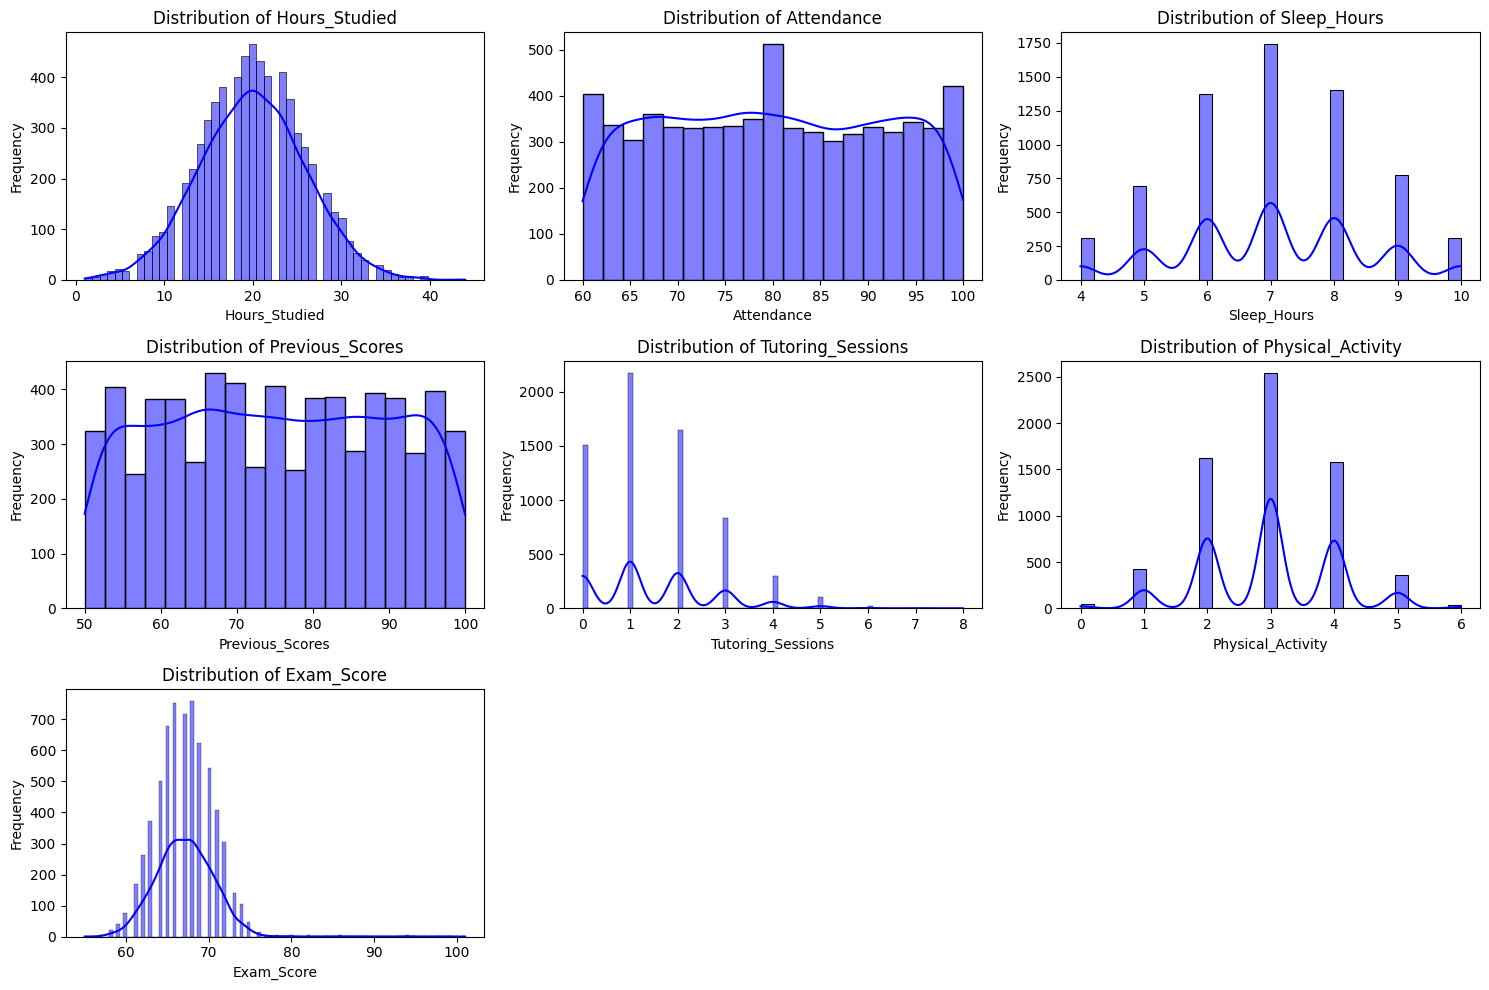

In [31]:
# Plot histograms for numerical features
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

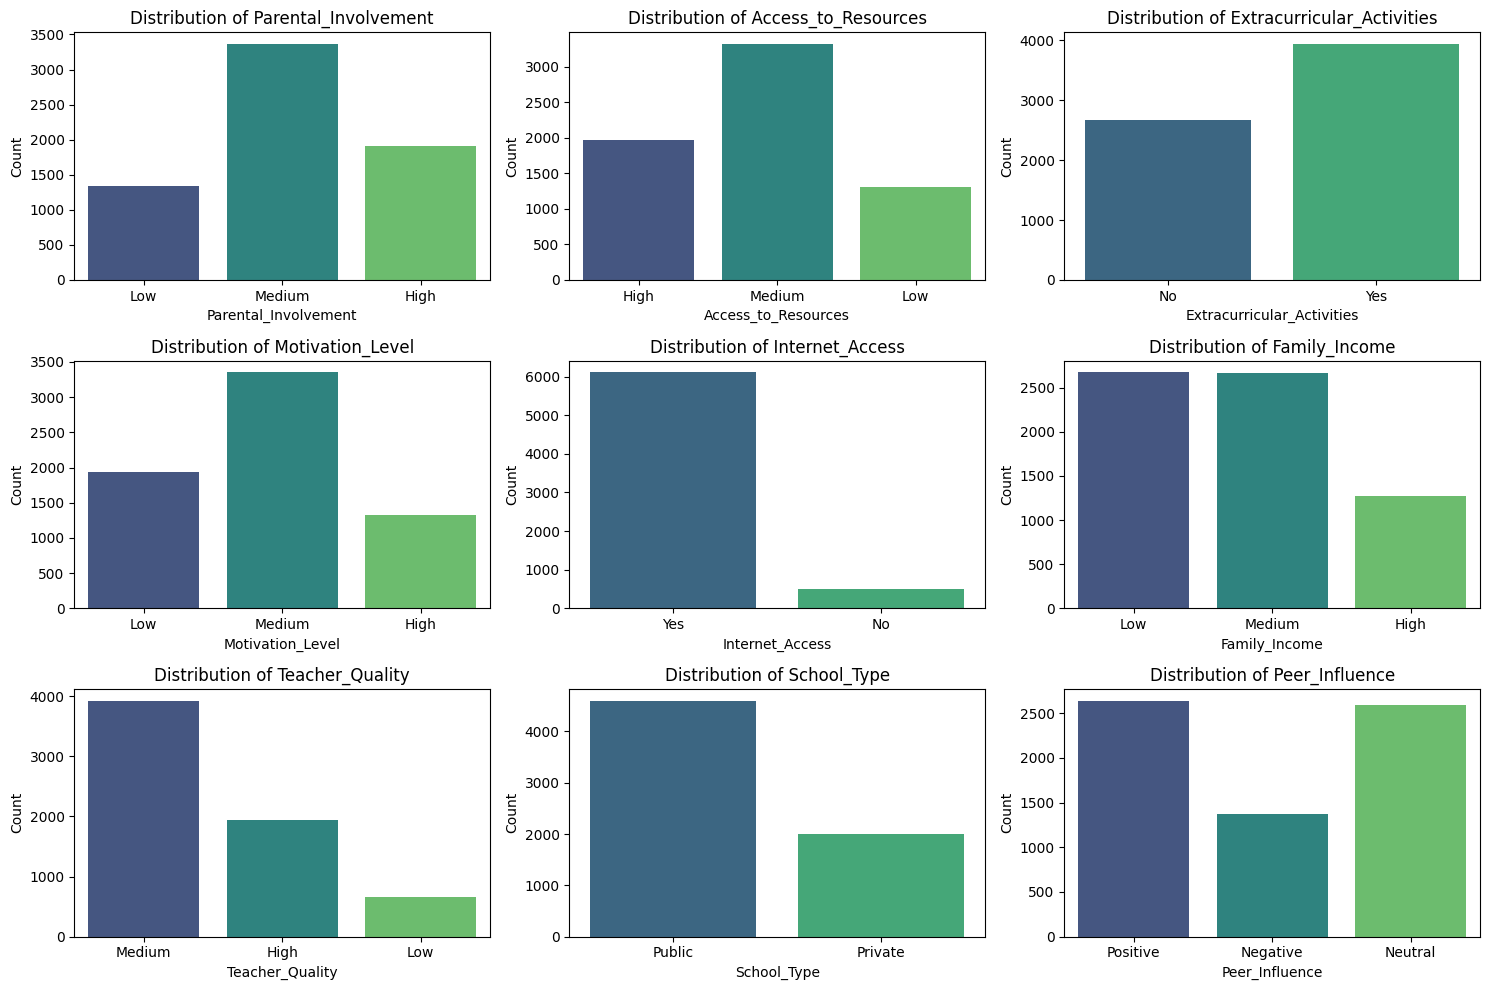

In [32]:
plt.figure(figsize=(15, 10))
max_plots = 9  # Maximum number of subplots

for i, column in enumerate(categorical_columns[:max_plots], 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=column, hue=column, palette='viridis', legend=False)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

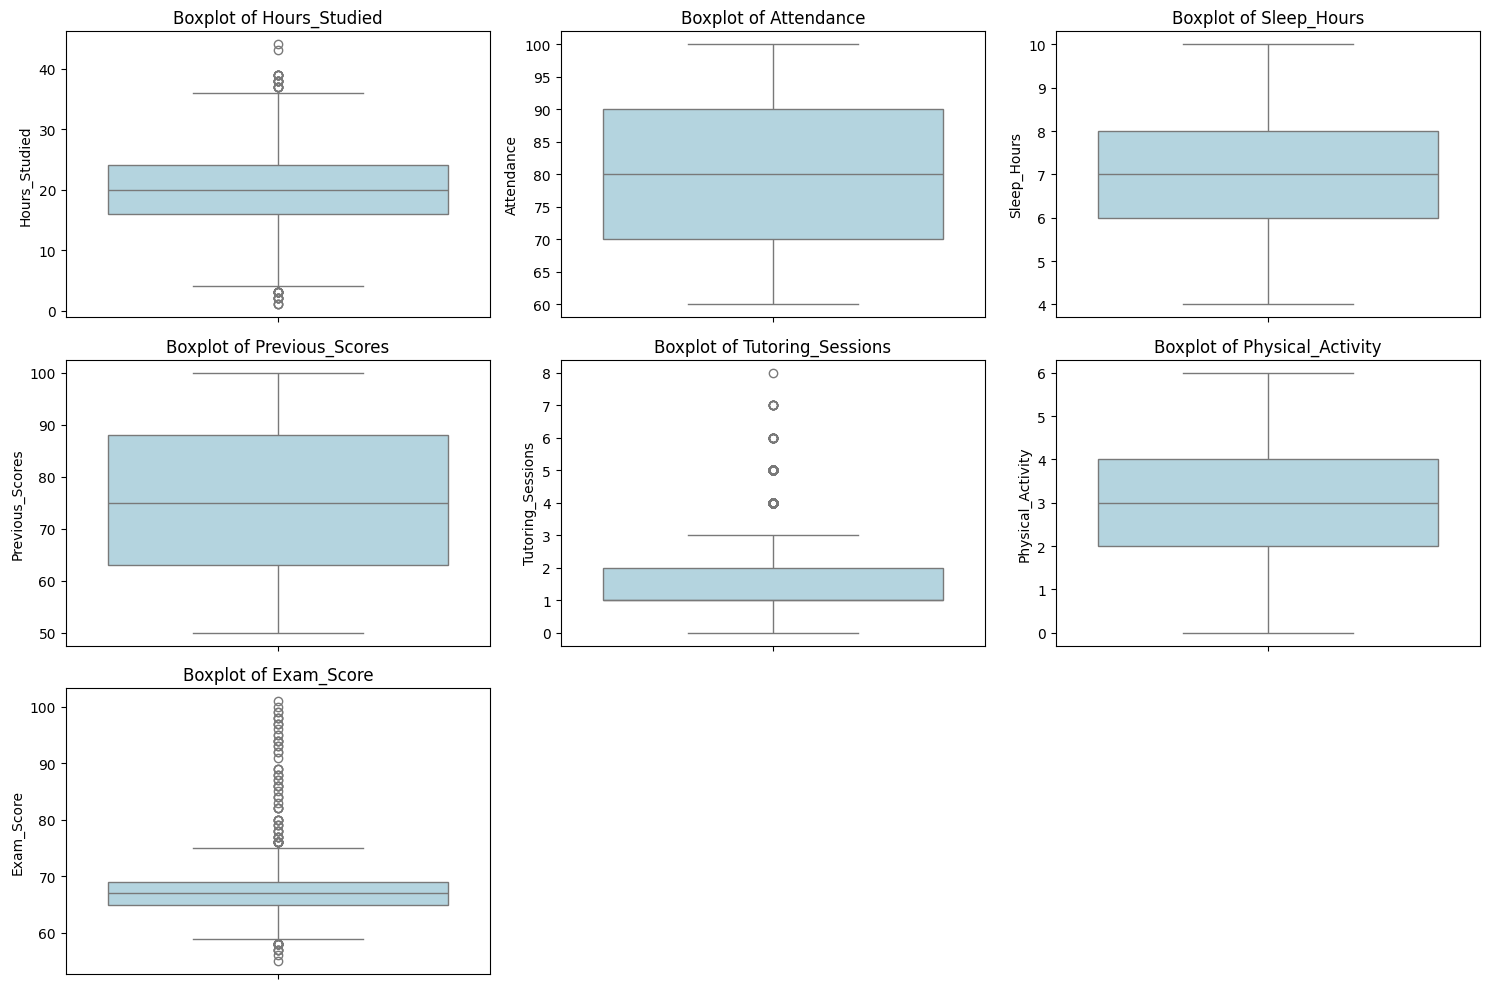

In [33]:
# Detect outliers using boxplots for numerical features
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=column, color='lightblue')
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

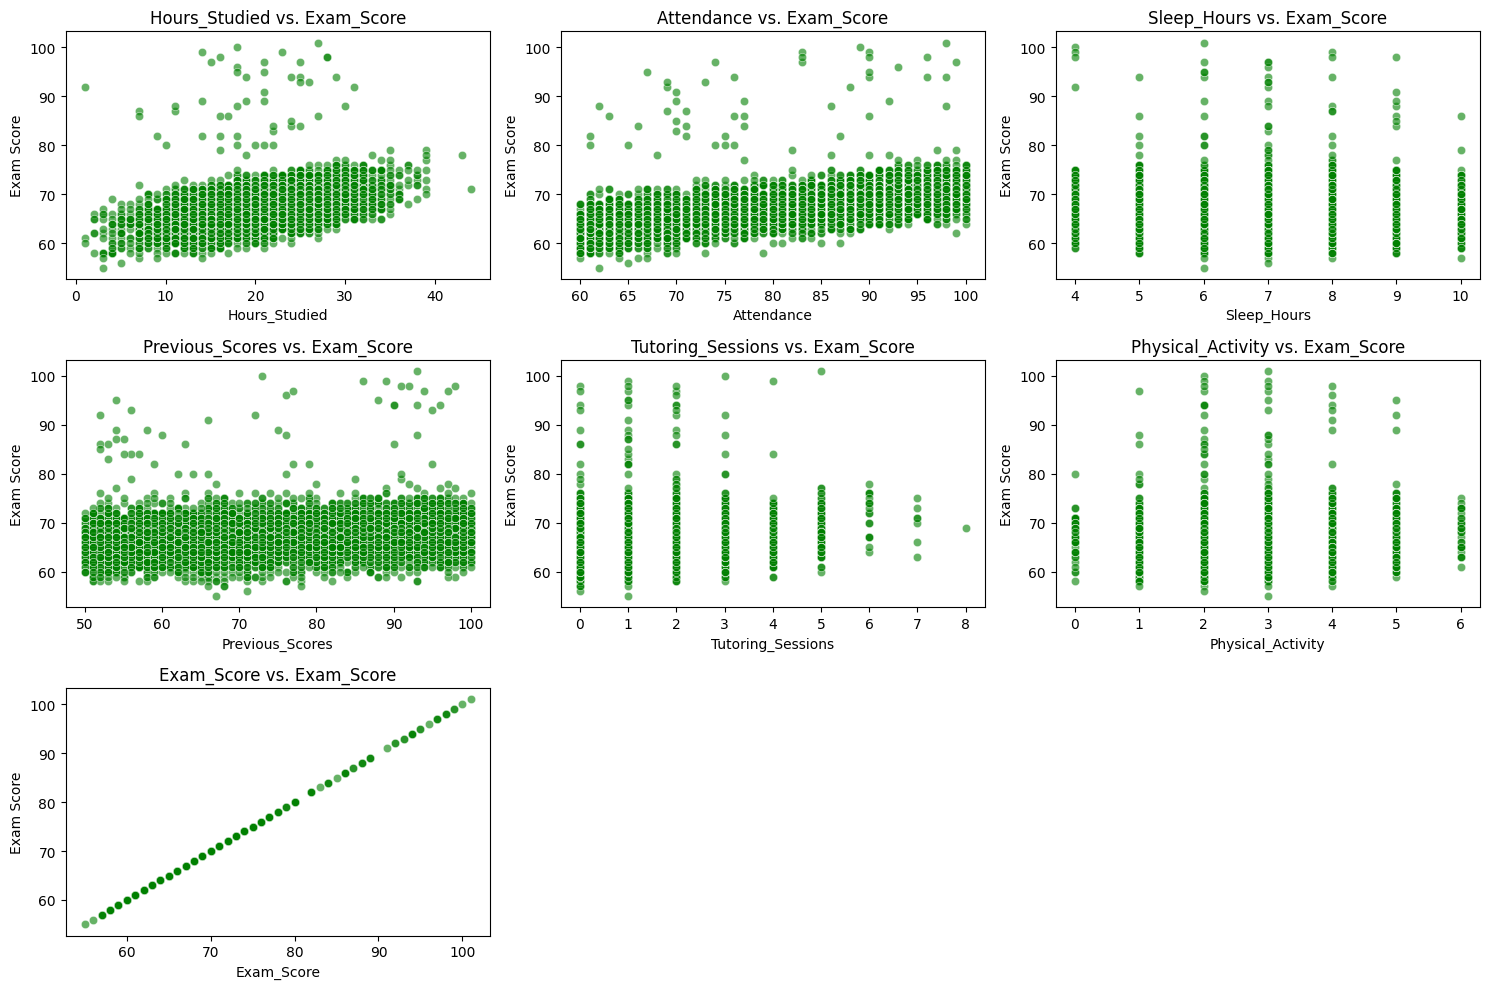

In [34]:
# Scatter plots for numerical features vs. Exam_Score
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df, x=column, y='Exam_Score', alpha=0.6, color='green')
    plt.title(f'{column} vs. Exam_Score')
    plt.xlabel(column)
    plt.ylabel('Exam Score')
plt.tight_layout()
plt.show()

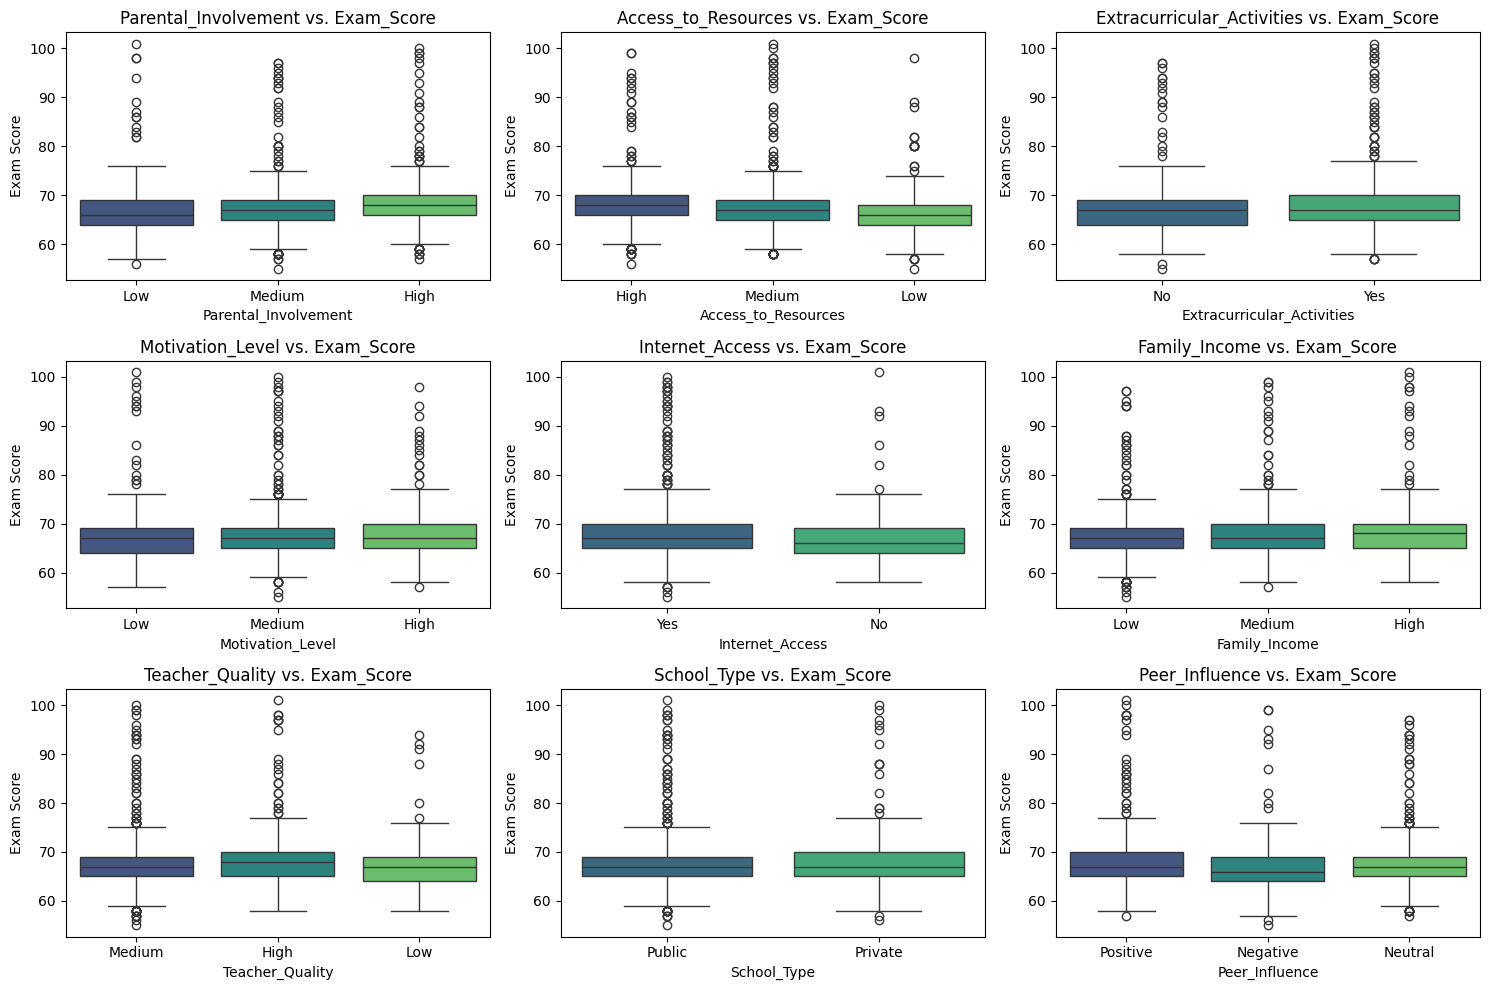

In [35]:
# Box plots for categorical features vs. Exam_Score
plt.figure(figsize=(15, 10))
max_plots = 9  # Maximum number of subplots

for i, column in enumerate(categorical_columns[:max_plots], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x=column, y='Exam_Score', hue=column, palette='viridis', legend=False)
    plt.title(f'{column} vs. Exam_Score')
    plt.xlabel(column)
    plt.ylabel('Exam Score')

plt.tight_layout()
plt.show()

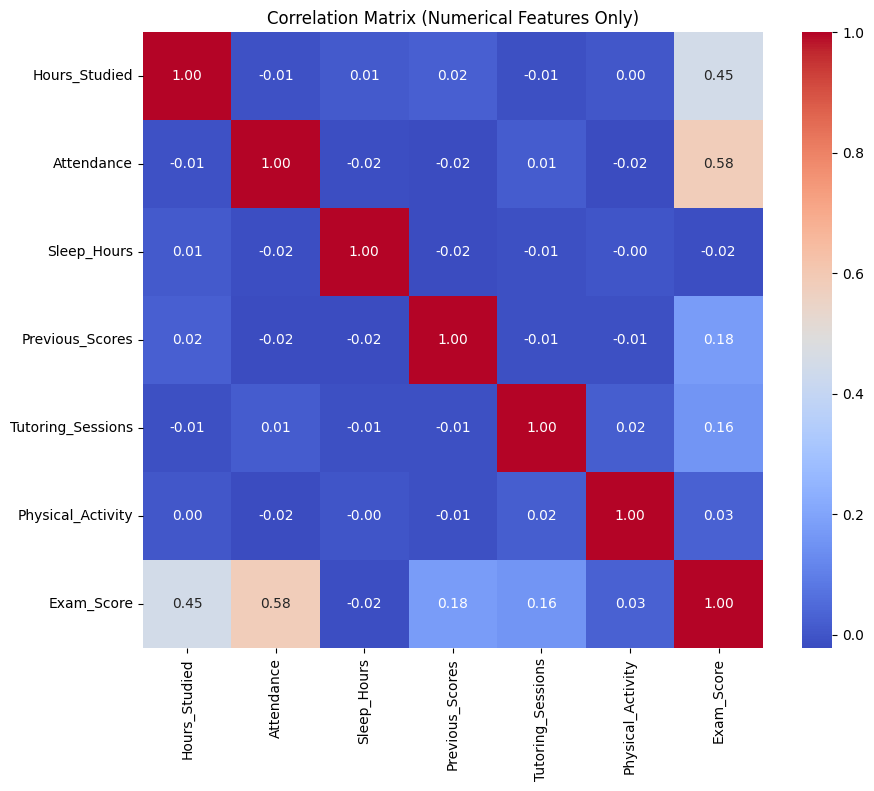

In [36]:
# Correlation matrix for numerical features
corr_matrix = df[numerical_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Numerical Features Only)')
plt.show()

## **Data Preprocessing**

In [4]:
# 1. Standardize categorical strings
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].astype(str).str.strip().str.lower()


In [5]:
# 2. Convert Yes/No to binary
binary_cols = ["Extracurricular_Activities", "Internet_Access", "Learning_Disabilities"]
for col in binary_cols:
    df[col] = df[col].map({"yes": 1, "no": 0})


In [6]:
# Map ordinal columns to numerical values
ordinal_cols = ["Motivation_Level", "Parental_Involvement", "Teacher_Quality"]
ordinal_mapping = {"low": 0, "medium": 1, "high": 2}
for col in ordinal_cols:
    if col in df.columns:
        df[col] = df[col].map(ordinal_mapping)


In [7]:
# 3. Encode ordinal features
ordinal_mapping = {"low": 0, "medium": 1, "high": 2}
ordinal_cols = ["Motivation_Level", "Parental_Involvement", "Teacher_Quality"]
for col in ordinal_cols:
    df[col] = df[col].map(ordinal_mapping)


In [8]:
# Handle missing values
categorical_missing = [
    "Teacher_Quality", "Parental_Education_Level", "Distance_from_Home",
    "Access_to_Resources", "Gender", "Peer_Influence", "School_Type", "Family_Income"
]
for col in categorical_missing:
    if col in df.columns:
        mode_value = df[col].mode()
        if not mode_value.empty:
            df[col] = df[col].fillna(mode_value.iloc[0])

numeric_missing = ["Hours_Studied", "Sleep_Hours", "Previous_Scores", "Physical_Activity", "Exam_Score"]
for col in numeric_missing:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

In [9]:
# 5. Handle outliers (applies to features only)
numeric_features = ["Hours_Studied", "Sleep_Hours", "Previous_Scores", "Physical_Activity"]
for col in numeric_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), df[col].median(), df[col])

In [10]:
# 6. Encode remaining categorical features
categorical_cols = df.select_dtypes(include=["object"]).columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])


In [11]:
# 7. Split features and target BEFORE scaling
target = "Exam_Score"
X = df.drop(columns=[target])
y = df[target]  # Keep target in original scale


In [12]:
# 8. Scale numerical features only (exclude target)
scaler = StandardScaler()
numeric_features = ["Hours_Studied", "Sleep_Hours", "Previous_Scores", "Physical_Activity"]
X[numeric_features] = scaler.fit_transform(X[numeric_features])


In [13]:
# 9. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# ------ Model Training ------
xgb_model = XGBRegressor(
    random_state=42,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1
)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [15]:
# ------ Save Artifacts ------
joblib.dump(xgb_model, "student_performance_model.pkl")
joblib.dump(scaler, "scaler.pkl")  # Needed for new data preprocessing

['scaler.pkl']

## **Model Evaluation and Analysis**

In [20]:
# Evaluate the model
y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Model Evaluation Metrics:
Mean Absolute Error: 1.17
Mean Squared Error: 5.19
R-squared: 0.63


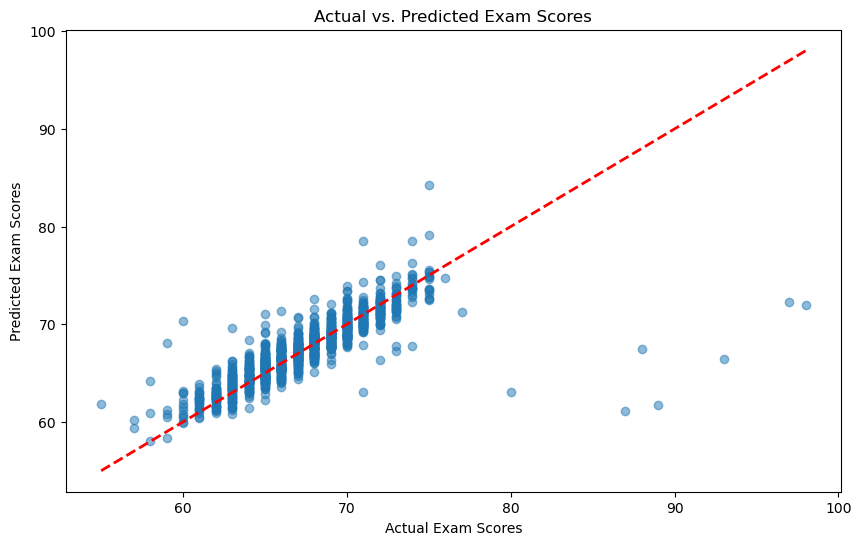

In [21]:
# Visualize model performance
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs. Predicted Exam Scores")
plt.show()

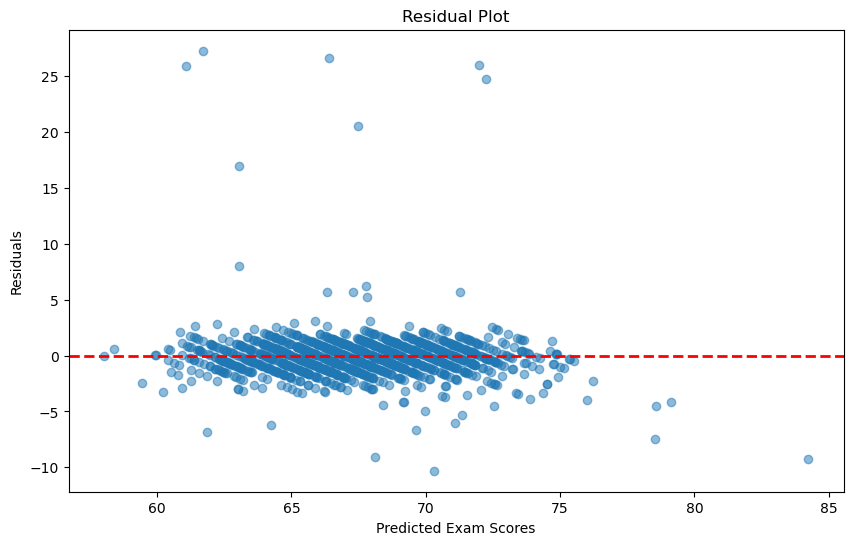

In [22]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel("Predicted Exam Scores")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

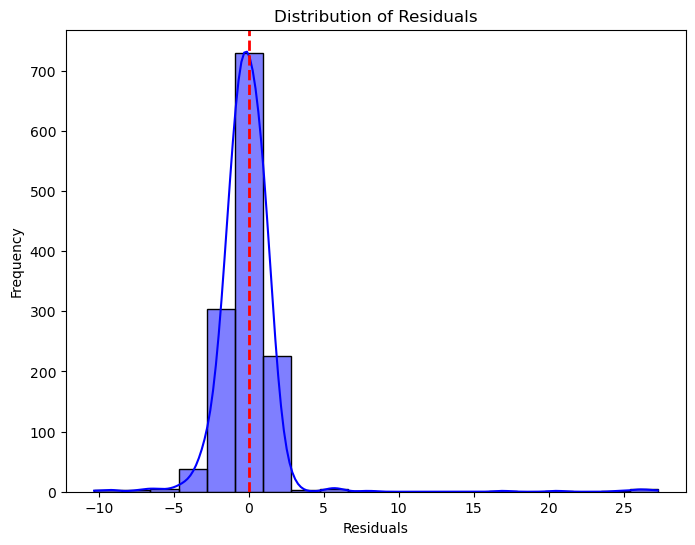

In [23]:
# Histogram of Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue', bins=20)
plt.axvline(x=0, color='r', linestyle='--', lw=2)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()